<a href="https://colab.research.google.com/github/Alok-2427/Aiml_lab/blob/main/2303A53003_Vemula_Alok_Batch_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
file_path = '/content/drive/MyDrive/HR analytics.csv'
df = pd.read_csv(file_path)
attrition_counts = df['Attrition'].value_counts()
print(f"Number of Attrition cases:\n{attrition_counts}")

Number of Attrition cases:
Attrition
No     1242
Yes     238
Name: count, dtype: int64


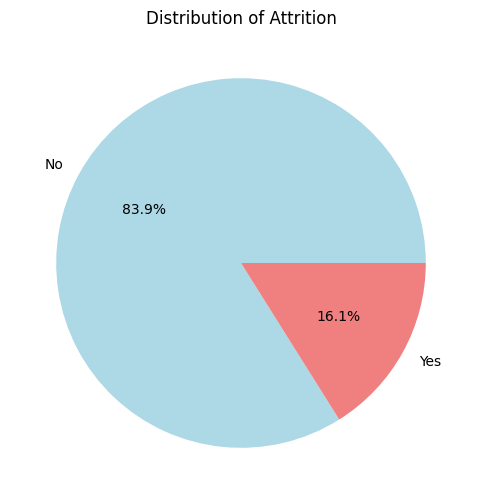

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index,autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Attrition')
plt.show()

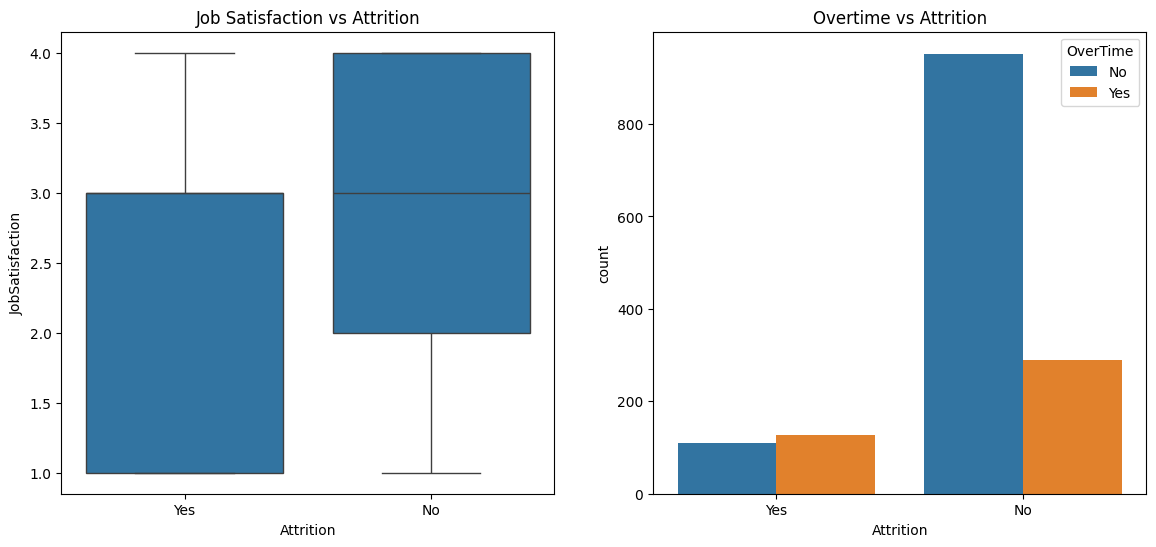

In [10]:
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.subplot(1, 2, 2)
sns.countplot(x='Attrition', hue='OverTime', data=df)
plt.title('Overtime vs Attrition')
plt.show()

In [11]:
from sklearn.impute import SimpleImputer
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns
imputer_numeric = SimpleImputer(strategy='median')
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])
print(f"Missing values after imputation:\n{df.isnull().sum()}")

Missing values in each column:
EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWor

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
